In [27]:
import numpy as np
import os
import tensorflow as tf


In [28]:
from keras.datasets import cifar10
from keras import initializers

import copy

In [29]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [30]:
print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2]) 

print(X_train.shape, X_train.dtype)

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32
(50000, 32, 32, 3) uint8


CNN layer 만들기

In [31]:
from keras.models import Sequential
from keras.layers import Dense , Flatten
from keras.layers.normalization import BatchNormalization
import keras.utils
from keras import layers , activations
from keras.optimizers import SGD



from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Hyper Parameters



In [ ]:

img_rows = 32
img_cols = 32

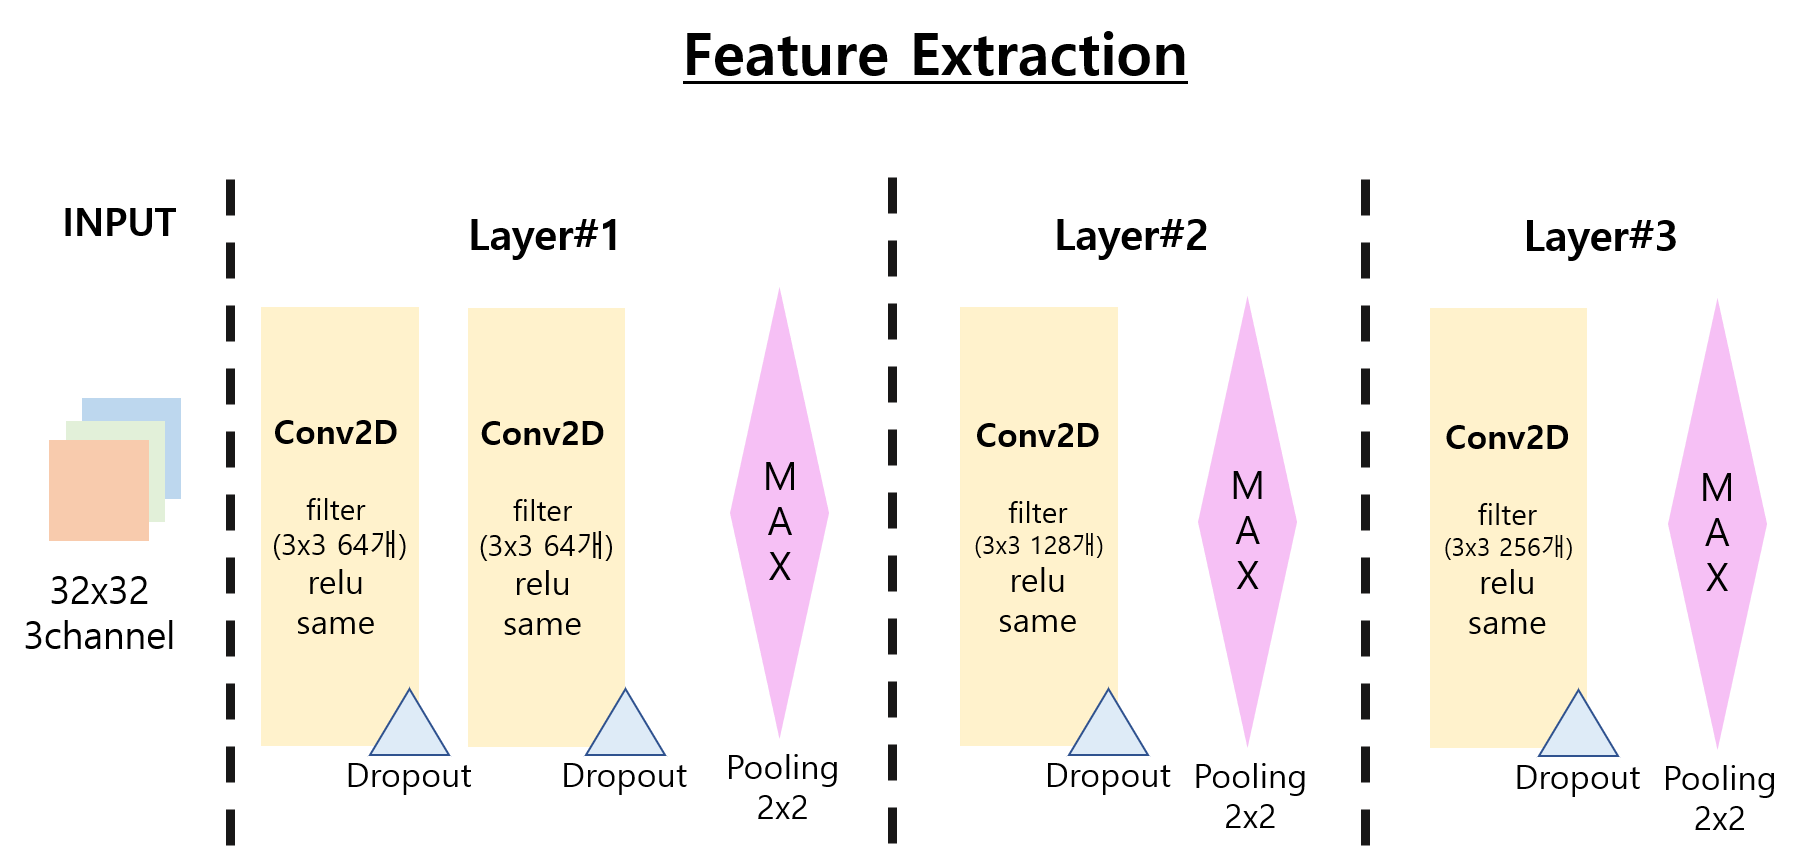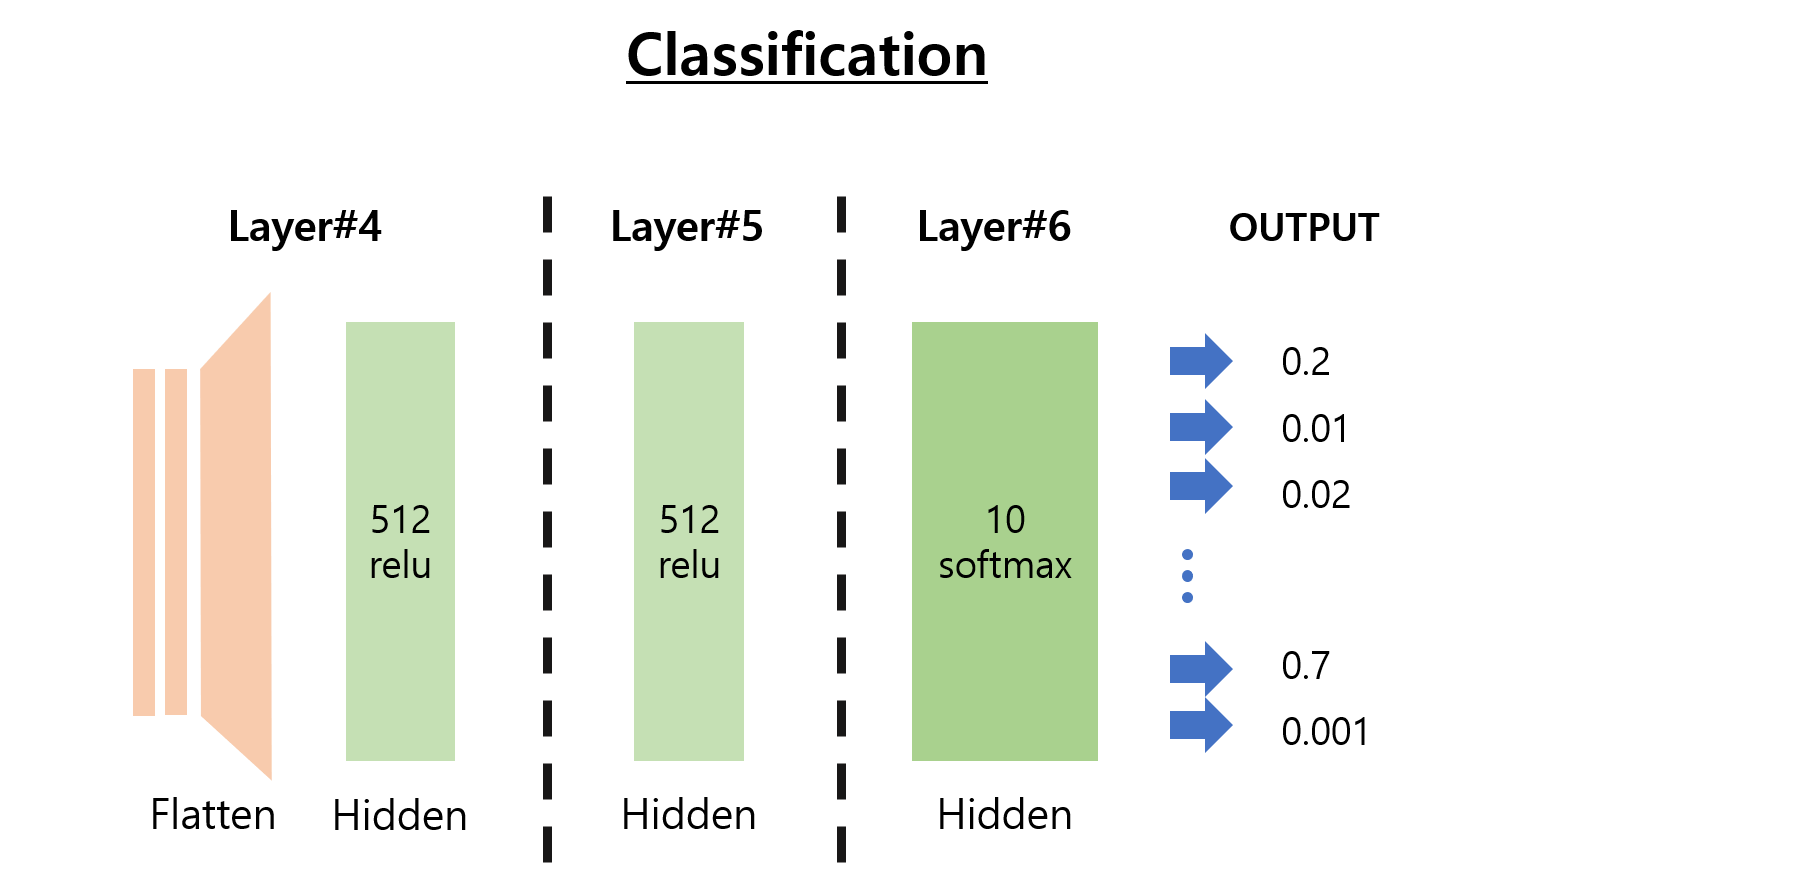

VGG16 구조 참고


https://bskyvision.com/504

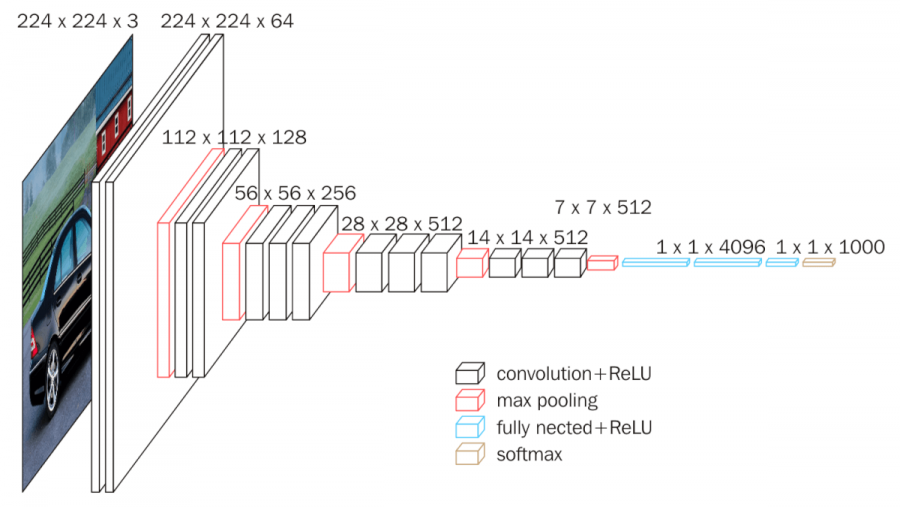

In [32]:

print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
    
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
    
X_train = newX_train
X_test = newX_test

print ("mean after normalization:", np.mean(X_train))
print ("std after normalization:", np.std(X_train))
print(X_train.max())

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996
2.126789409516928


In [34]:
# VGG16

model_cnn = Sequential()

# Conv Layer
model_cnn.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu',
                     input_shape=(32, 32, 3)))
# dropout
#model_cnn.add(Dropout(0.5))

# Conv Layer
model_cnn.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu'))
# dropout
model_cnn.add(Dropout(0.5))
# Maxpooling
model_cnn.add(MaxPooling2D(pool_size=(2,2)))





# Conv Layer
model_cnn.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu'))
# dropout
model_cnn.add(Dropout(0.5))

# Maxpooling
model_cnn.add(MaxPooling2D(pool_size=(2,2)))



# Conv Layer
model_cnn.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu'))
# dropout
model_cnn.add(Dropout(0.5))

# Maxpooling
model_cnn.add(MaxPooling2D(pool_size=(2,2)))



# Flatten
model_cnn.add(Flatten())

# FC
model_cnn.add(Dense(512,activation='relu'))

# FC
model_cnn.add(Dense(512,activation='relu'))

# Output
model_cnn.add(Dense(10,activation='softmax'))



In [35]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 128)        

CNN - LeNet model


In [37]:
# LeNet Model

model_cnn = Sequential()

# Conv Layer 1
model_cnn.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu',
                     input_shape=(32, 32, 3)))
# Maxpooling
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

# Conv Layer 2
model_cnn.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu'))
# Maxpooling
model_cnn.add(MaxPooling2D(pool_size=(2,2)))


# Conv Layer 3
model_cnn.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same',
                     activation='relu'))
# Maxpooling
model_cnn.add(MaxPooling2D(pool_size=(2,2)))




# Flatten
model_cnn.add(Flatten())

# FC
model_cnn.add(Dense(256,activation='relu'))

# dropout
model_cnn.add(Dropout(0.5))

# Output
model_cnn.add(Dense(10,activation='softmax'))




In [38]:
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)             

In [40]:
# Model Comfile

# gradient decent 추가
sgd = SGD(lr=0.001, decay=0.95 )

model_cnn.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics='accuracy')

In [41]:
# train / valid split

(X_train, X_valid) = X_train[10000:], X_train[:10000]
(y_train, y_valid) = y_train[10000:], y_train[:10000]

In [42]:
print(len(X_train))

40000


In [43]:
import keras.utils

one_hot_y_train = keras.utils.to_categorical(y_train, num_classes=10)
one_hot_y_valid = keras.utils.to_categorical(y_valid, num_classes=10)


Data generation

https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

In [44]:
from keras.preprocessing.image import ImageDataGenerator


print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

Using real-time data augmentation.


In [45]:
datagen.fit(X_train)

In [46]:
hist = model_cnn.fit_generator(datagen.flow(X_train, one_hot_y_train, batch_size=200) , 
                               epochs=120,  validation_data=(X_valid, one_hot_y_valid), 
                               shuffle=True, 
                               workers=4)

Epoch 1/120
200/200 [==============================] - 20s 99ms/step - loss: 1.7211 - accuracy: 0.3731 - val_loss: 1.3812 - val_accuracy: 0.5022
Epoch 2/120
200/200 [==============================] - 19s 97ms/step - loss: 1.4116 - accuracy: 0.4918 - val_loss: 1.1740 - val_accuracy: 0.5762
Epoch 3/120
200/200 [==============================] - 19s 97ms/step - loss: 1.2744 - accuracy: 0.5468 - val_loss: 1.1500 - val_accuracy: 0.5847
Epoch 4/120
200/200 [==============================] - 20s 98ms/step - loss: 1.1876 - accuracy: 0.5762 - val_loss: 0.9809 - val_accuracy: 0.6465
Epoch 5/120
200/200 [==============================] - 19s 96ms/step - loss: 1.1098 - accuracy: 0.6061 - val_loss: 1.0034 - val_accuracy: 0.6430
Epoch 6/120
200/200 [==============================] - 19s 96ms/step - loss: 1.0672 - accuracy: 0.6233 - val_loss: 0.9025 - val_accuracy: 0.6783
Epoch 7/120
200/200 [==============================] - 19s 97ms/step - loss: 1.0261 - accuracy: 0.6383 - val_loss: 0.9242 - val_ac

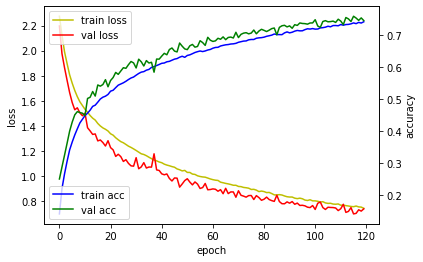

In [25]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [26]:
one_hot_y_test = keras.utils.to_categorical(y_test, num_classes=10)

model_cnn.evaluate(X_test, one_hot_y_test, batch_size=200)

50/50 [==============================] - 0s 3ms/step - loss: 0.7598 - accuracy: 0.7370


[0.7597822546958923, 0.7369999885559082]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 고양이 / 정답: 고양이


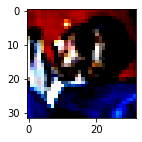

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 배 / 정답: 배


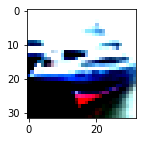

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 배 / 정답: 배


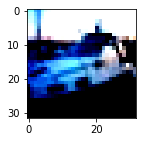

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 비행기 / 정답: 비행기


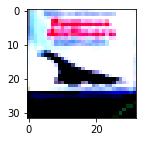

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 개구리 / 정답: 개구리


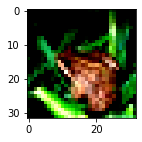

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 개구리 / 정답: 개구리


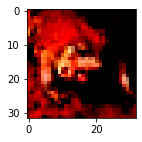

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 자동차 / 정답: 자동차


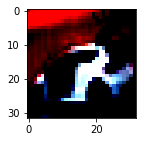

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 사슴 / 정답: 개구리


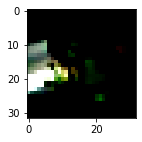

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 고양이 / 정답: 고양이


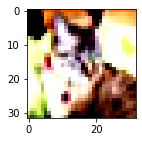

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 자동차 / 정답: 자동차


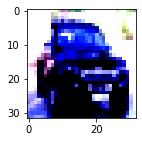

In [ ]:
#모델 사용하기
# 이미지의 종류가 무엇인지에 대한 리스트
labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']
# 출력 그림의 크기를 결정합니다.
plt.rcParams["figure.figsize"] = (2,2)
# Test Set의 10개를 맞추어 봅시다.
for i in range(10):
  # 모델 사용 
  output = model_cnn.predict(X_test[i].reshape(1,32, 32, 3))
  
  # 이미지 출력 
  plt.imshow(X_test[i].reshape(32, 32, 3))
  # np.argmax()가 labels의 인덱스가 되어 labels 배열에 있는 문자열을 출력합니다.
  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(one_hot_y_test[i])])
  plt.show()